# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install with Python 3.6.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.6 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment4 using this file format:</u> <b>Yourfirstname_lastname_Assignment4.ipynb</b> 

#### <b>Deadline</b>: <u>Tuesday, Nov-20-2018 11:59 PM.</u>

### Getting started: Installing Numpy, Keras and TensorFlow

Keras is a high-level Python API that allows you to easily construct, train, and apply neural networks.
However, Keras is not a neural network library itself and depends on one of several neural network backends. We will use the Tensorflow backend. TensorFlow is an open-source library for neural networks (and other mathematical models based on sequences of matrix and tensor computations), originally developed by Google.Also, Keras uses numpy data structures. 

Installing Numpy, TensorFlow and Keras: 

We suggest that you use the Python package management system pip. 
On most systems, the following commands will work:

- $ pip install numpy matplotlib.

- $ pip install tensorflow

- $ pip install keras

### OR Using Anaconda (Easy and Prefered)

- $ conda install keras scikit-learn pandas

Note that this will likely install the CPU version of TensorFlow that does not use the GPU to speed up neural network training. For this assignment, training on the CPU will be sufficient, but if your computer has a GPU (or you want to try running the assignment in the cloud), follow the installation instructions on the tensorflow page. 

If you get stuck during the installation, you can find installation instructions for each package here: 

- Tensorflow: https://www.tensorflow.org/install/ 
- Keras: https://keras.io/#installation 

### Introduction
In this assignment you will use the Keras Neural Network API for Python to build neural networks for image classification. 

#### Data Set

We will work on the CIFAR-10 image data set  described here: https://www.cs.toronto.edu/~kriz/cifar.html.

The data set contains 60.000 images labeled with 10 different categories:

Numeric ID	Category Name
- 0	airplane
- 1	automobile
- 2	bird
- 3	cat
- 4	deer
- 5	dog
- 6	frog
- 7	horse
- 8	ship
- 9	truck


Each image is 32x32 pixels large and there are three color channels (red, green blue). Each image can therefore be represented as three 32x32 matrices or one 32x32x3 cube.


In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras import Sequential 
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation,Conv2d
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Part 1 (20 pts) - Loading the CIFAR-10 Data
The following code fragment imports the CIFAR-10 data using Keras. 

In [2]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

In [3]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Split the training data into training and validation (40000 for training, and 10000 for validation). Thus you have xtrain, ytrain, xvalid, yvalid, xtest, and ytest are numpy n-dimension arrays contains the training validation and testing data.

The input training data (xtrain) is a 4-dimensional array containing 40000 images, each of them a 32x32x3 tensor. Numpy arrays can be indexed like nested Python lists, so xtrain[0] will give you the first 32x32x3 image.

The input label (ytrain) is a vector containing the numeric class for each image (see table above for what the numeric IDs mean). For example, xtrain[0] is am image of a frog and therefore ytrain[0] contains the value 6. 

## Visualizing Images
If you want to take a look at the individual images, you can do so using matplotlib (this step is optional). 

(40000, 32, 32, 3)
(40000, 1)


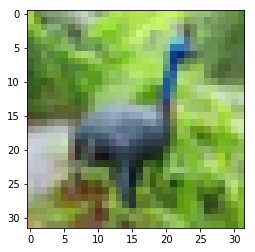

In [4]:
plt.imshow(xtrain[6])

xval = xtrain[:10000,:,:,:]
yval = ytrain[:10000,:]
xtrain = xtrain[10000:,:,:,:]
ytrain = ytrain[10000:,:]

print(xtrain.shape)
print(ytrain.shape)

a.[20 Pnts] 1-hot representation for class labels

The output layer of the neural networks we will train will contain 10 neurons corresponding to the 10 classes. The classifier predicts the class whose corresponding neuron has the highest activation. We need to convert the numeric indices for each image into a 1-hot vector of length 10, so that the for class label n the n-th element is 1 and all other elements are 0. For example, if the class label is 6, we should get the 1-hot vector [0 0 0 0 0 0 1 0 0 0].
The class labels for the entire training and set should then be represented as a 50000x10 matrix, and the testing data as a 10000x10 matrix (there are 10k test images). 

Write the function load_cifar10(), which should load the cifar-10 data as described above and should return 6 numpy arrays xtrain, ytrain_1hot, xval, yval_1hot, xtest, ytest_1hot. Your function should convert the y arrays into the 1-hot representation. You can either do this using loops (slow), using numpy fancy indexing (see numpy documentation), or by using appropriate functions in the numpy or Keras API. 

Your function should also do the following normalization on the data. The R,G and B values for each pixel range between 0 and 255. Before returning the training data, normalize it so that these value range between 0.0 and 1.0.

In [5]:
def load_cifar10(xtrain,xtest,xval,ytrain,ytest,yval):
    xtest = np.divide(xtest,255)
    xtrain = np.divide(xtrain,255)
    xval = np.divide(xval,255)
    ytrain_1hot = to_categorical(ytrain)
    ytest_1hot = to_categorical(ytest)
    yval_1hot = to_categorical(yval)
    return xtrain, xval, xtest, ytrain_1hot, yval_1hot, ytest_1hot

xtrain, xval, xtest, ytrain_1hot, yval_1hot, ytest_1hot = load_cifar10(xtrain,xtest,xval,ytrain,ytest,yval)

### Check shapes

In [6]:
print(xtrain.shape)
print(ytrain_1hot.shape)

(40000, 32, 32, 3)
(40000, 10)


In [7]:
print(xval.shape)
print(yval_1hot.shape)

(10000, 32, 32, 3)
(10000, 10)


In [8]:
print(xtest.shape)
print(ytest_1hot.shape)

(10000, 32, 32, 3)
(10000, 10)


### Check one-hot encoding

In [9]:
ytrain_1hot[0], yval_1hot[1], ytest_1hot[2]

(array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32))

##### b. [20 Pnts]  In this task, you will implement an MLP network using keras.Sequential method with:

- Batch size: 16. 
- Number of hidden layers: 1 (100 neuron).
- use SGD optimizer, Learning Rate: 0.01.
- #of epochs 10.
- Use softmax layer for your output.
- use Relu as your activation function.

Keep all other hyperparameters (activation function, etc.) at their default settings.


Find the performance (accuracy) of your model on the validation set and test set after training for 10 epochs.

In [10]:
input_dim = np.prod(xtrain.shape[1:])
xtrainRe = xtrain.reshape(xtrain.shape[0],input_dim)
xtestRe = xtest.reshape(xtest.shape[0],input_dim)
xvalRe = xval.reshape(xval.shape[0],input_dim)

model = Sequential()
model.add(Dense(100,activation='relu',input_shape = (input_dim,)))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.fit(xtrainRe,ytrain_1hot,epochs=10,batch_size=16)

print(model.evaluate(xtestRe, ytest_1hot, batch_size=16))

Epoch 1/10
40000/40000 [==============================] - 13s 332us/step - loss: 1.8925 - acc: 0.3178
Epoch 2/10
40000/40000 [==============================] - 14s 349us/step - loss: 1.7193 - acc: 0.3892
Epoch 3/10
40000/40000 [==============================] - 13s 334us/step - loss: 1.6413 - acc: 0.4190
Epoch 4/10
40000/40000 [==============================] - 11s 284us/step - loss: 1.5948 - acc: 0.4358
Epoch 5/10
40000/40000 [==============================] - 12s 293us/step - loss: 1.5577 - acc: 0.4496
Epoch 6/10
40000/40000 [==============================] - 11s 286us/step - loss: 1.5247 - acc: 0.4614
Epoch 7/10
40000/40000 [==============================] - 11s 284us/step - loss: 1.5012 - acc: 0.4691
Epoch 8/10
40000/40000 [==============================] - 12s 290us/step - loss: 1.4788 - acc: 0.4766
Epoch 9/10
40000/40000 [==============================] - 11s 281us/step - loss: 1.4593 - acc: 0.4836
Epoch 10/10
10000/10000 [==============================] - 1s 99us/step
[1.4908163

c. [10 Pnts] How many parameters in the model implemented in b?

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


d. [10 Pnts] At which epoch your model starts to overfit? Do you think early stopping would be a good solution to avoid overfitting in this case, explain?

In [12]:
# My model does not overfit with 10 epochs so early stopping would be a bad idea, since my test accuracy is .479 
# and training accuracy after 10 epochs is .489 so they are almost the same

a. [40 pts] You must have noticed that one needs to set several parameters—such as the number of hidden layers, the number of neurons in each hidden layer, the non-linearity or activation function to be used, etc. These quantities are known as the hyper-parameters of the network. They need to be specified by the user creating the neural network model.

In this task, you will evaluate the performance of your network for varying values of hyperparameters. Keeping the rest of the values constant (and equal to the default values), adjust the values of parameters as described below. Find the performance (accuracy) of your model on the validation set and plot a trend graph for each of the following.

- Batch size: 32, 64, 128 (default 32).
- Number of hidden layers: 1, 2, 4 (default 2).
- SGD optimizer, Learning Rate: 0.001, 0.01, 0.1, 1 (default 0.01).
- Use 10 epochs for all the experiments.
- activation function Relu for all the experiments.

Use these values to create the most successful model you can (evaluated based on validation scores) and report its accuracy on the test data. Keep all other hyperparameters (number of epochs, activation function, etc.) at their default settings. 

In [13]:
######### FINAL ########
batch_size = [32,64,128]
learn_rate = [.001,.01,.1,1]
accs1=[]
accs2=[]
accs4=[]

model = Sequential()
model.add(Dense(100,activation='relu',input_shape = (input_dim,)))
model.add(Dense(10, activation='softmax')) 
for l in learn_rate:
    sgd = SGD(lr=l)
    for b in batch_size:
        model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
        model.fit(xtrainFlat,ytrain_1hot,epochs=10,batch_size=b)
        print("Batch size: ",b,"    Hidden Layers: 1    Learn Rate: ",l)
        evaluation=model.evaluate(xtestFlat, ytest_1hot, batch_size=b)
        accs1.append(evaluation[1])
        print(evaluation)

model = Sequential()
model.add(Dense(100,activation='relu',input_shape = (input_dim,)))
model.add(Dense(100,activation='relu',input_shape = (input_dim,)))
model.add(Dense(10, activation='softmax'))
for l in learn_rate:
    sgd = SGD(lr=l)
    for b in batch_size:
        model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
        model.fit(xtrainFlat,ytrain_1hot,epochs=10,batch_size=b)
        print("Batch size: ",b,"    Hidden Layers: 2    Learn Rate: ",l)
        evaluation=model.evaluate(xtestFlat, ytest_1hot, batch_size=b)
        accs2.append(evaluation[1])
        print(evaluation)

model = Sequential()
model.add(Dense(100,activation='relu',input_shape = (input_dim,)))
model.add(Dense(100,activation='relu',input_shape = (input_dim,)))
model.add(Dense(100,activation='relu',input_shape = (input_dim,)))
model.add(Dense(100,activation='relu',input_shape = (input_dim,)))
model.add(Dense(10, activation='softmax'))
for l in learn_rate:
    sgd = SGD(lr=l)
    for b in batch_size:     
        model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
        model.fit(xtrainRe,ytrain_1hot,epochs=10,batch_size=b)
        print("Batch size: ",b,"    Hidden Layers: 4    Learn Rate: ",l)
        evaluation=model.evaluate(xtestRe, ytest_1hot, batch_size=b)
        accs4.append(evaluation[1])
        print(evaluation)
        


Epoch 1/10
40000/40000 [==============================] - 7s 168us/step - loss: 2.1103 - acc: 0.2386
Epoch 2/10
40000/40000 [==============================] - 7s 170us/step - loss: 1.9484 - acc: 0.3165
Epoch 3/10
40000/40000 [==============================] - 9s 234us/step - loss: 1.8863 - acc: 0.3411
Epoch 4/10
40000/40000 [==============================] - 7s 163us/step - loss: 1.8474 - acc: 0.3551
Epoch 5/10
40000/40000 [==============================] - 7s 187us/step - loss: 1.8192 - acc: 0.3632
Epoch 6/10
40000/40000 [==============================] - 6s 151us/step - loss: 1.7982 - acc: 0.3727
Epoch 7/10
40000/40000 [==============================] - 6s 152us/step - loss: 1.7796 - acc: 0.3811
Epoch 8/10
40000/40000 [==============================] - 5s 136us/step - loss: 1.7626 - acc: 0.3866
Epoch 9/10
40000/40000 [==============================] - 5s 129us/step - loss: 1.7487 - acc: 0.3937
Epoch 10/10
40000/40000 [==============================] - 6s 140us/step - loss: 1.7364 - a

40000/40000 [==============================] - 2s 59us/step - loss: 1.6637 - acc: 0.4239
Epoch 3/10
40000/40000 [==============================] - 2s 62us/step - loss: 1.6610 - acc: 0.4248
Epoch 4/10
40000/40000 [==============================] - 2s 58us/step - loss: 1.6583 - acc: 0.4255
Epoch 5/10
40000/40000 [==============================] - 2s 59us/step - loss: 1.6555 - acc: 0.4261
Epoch 6/10
40000/40000 [==============================] - 2s 62us/step - loss: 1.6528 - acc: 0.4262
Epoch 7/10
40000/40000 [==============================] - 2s 60us/step - loss: 1.6502 - acc: 0.4268
Epoch 8/10
40000/40000 [==============================] - 2s 59us/step - loss: 1.6472 - acc: 0.4301
Epoch 9/10
40000/40000 [==============================] - 2s 58us/step - loss: 1.6450 - acc: 0.4291
Epoch 10/10
40000/40000 [==============================] - 2s 57us/step - loss: 1.6419 - acc: 0.4328
Batch size:  128     Hidden Layers: 2    Learn Rate:  0.001
10000/10000 [==============================] - 0s 

40000/40000 [==============================] - 4s 104us/step - loss: 1.3098 - acc: 0.5330
Epoch 5/10
40000/40000 [==============================] - 4s 101us/step - loss: 1.2989 - acc: 0.5362
Epoch 6/10
40000/40000 [==============================] - 4s 100us/step - loss: 1.2893 - acc: 0.5393
Epoch 7/10
40000/40000 [==============================] - 4s 101us/step - loss: 1.2812 - acc: 0.5445
Epoch 8/10
40000/40000 [==============================] - 4s 105us/step - loss: 1.2750 - acc: 0.5478
Epoch 9/10
40000/40000 [==============================] - 4s 101us/step - loss: 1.2663 - acc: 0.5495
Epoch 10/10
40000/40000 [==============================] - 4s 104us/step - loss: 1.2552 - acc: 0.5501
Batch size:  64     Hidden Layers: 4    Learn Rate:  0.01
10000/10000 [==============================] - 1s 71us/step
[1.3918682231903077, 0.5074]
Epoch 1/10
40000/40000 [==============================] - 4s 94us/step - loss: 1.2114 - acc: 0.5691
Epoch 2/10
40000/40000 [==============================] 

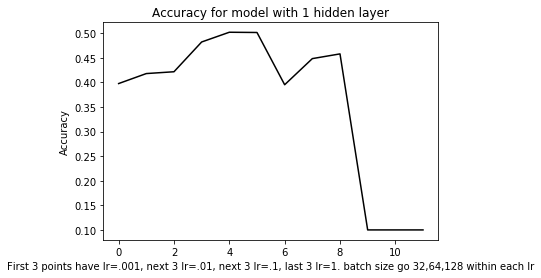

In [16]:
plt.plot(accs1,  color='black')
plt.xlabel("First 3 points have lr=.001, next 3 lr=.01, next 3 lr=.1, last 3 lr=1. batch size go 32,64,128 within each lr")
plt.ylabel("Accuracy")
plt.title("Accuracy for model with 1 hidden layer")
plt.show()
# so, for model with 1 hidden layer the best hyperparameters would be lr=.01, bs=64

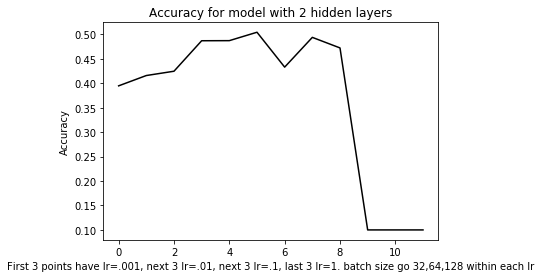

In [17]:
plt.plot(accs2,  color='black')
plt.xlabel("First 3 points have lr=.001, next 3 lr=.01, next 3 lr=.1, last 3 lr=1. batch size go 32,64,128 within each lr")
plt.ylabel("Accuracy")
plt.title("Accuracy for model with 2 hidden layers")
plt.show()
# so, for model with 2 hidden layers the best hyperparameters would be lr=.01, bs=128

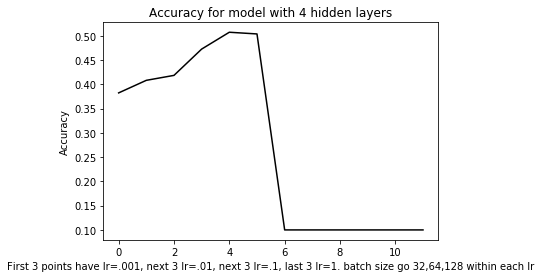

In [18]:
plt.plot(accs4,  color='black')
plt.xlabel("First 3 points have lr=.001, next 3 lr=.01, next 3 lr=.1, last 3 lr=1. batch size go 32,64,128 within each lr")
plt.ylabel("Accuracy")
plt.title("Accuracy for model with 4 hidden layers")
plt.show()
# so, for model with 4 hidden layers the best hyperparameters would be lr=.01, bs=64

In [ ]:
# So, the most successful model has 4 hidden layers with bs=64, lr=.01 and reports accuracy of .5074 on the test data